In [2]:
#import all library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer,Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import statsmodels.api as sm

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
#Read CSV file
housing = pd.read_csv('../Data/regression_train.csv')
housing = housing[housing['resale_price'] < 1000000] #781888
housing.head()                 

,id,resale_price,mid_storey,floor_area_sqft,hdb_age,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_within_500m,mall_within_1km,mall_within_2km,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,affiliation,train,indicator_to_drop,mature,top_10_pri_sch,cutoff_point_rank,percent_rental_flat,percent_4room_and_above_flat,distance_for_hawker_and_mrt,distance_for_mall_and_mrt,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,...,tranc_yearmonth_2017-03,tranc_yearmonth_2017-04,tranc_yearmonth_2017-05,tranc_yearmonth_2017-06,tranc_yearmonth_2017-07,tranc_yearmonth_2017-08,tranc_yearmonth_2017-09,tranc_yearmonth_2017-10,tranc_yearmonth_2017-11,tranc_yearmonth_2017-12,tranc_yearmonth_2018-01,tranc_yearmonth_2018-02,tranc_yearmonth_2018-03,tranc_yearmonth_2018-04,tranc_yearmonth_2018-05,tranc_yearmonth_2018-06,tranc_yearmonth_2018-07,tranc_yearmonth_2018-08,tranc_yearmonth_2018-09,tranc_yearmonth_2018-10,tranc_yearmonth_2018-11,tranc_yearmonth_2018-12,tranc_yearmonth_2019-01,tranc_yearmonth_2019-02,tranc_yearmonth_2019-03,tranc_yearmonth_2019-04,tranc_yearmonth_2019-05,tranc_yearmonth_2019-06,tranc_yearmonth_2019-07,tranc_yearmonth_2019-08,tranc_yearmonth_2019-09,tranc_yearmonth_2019-10,tranc_yearmonth_2019-11,tranc_yearmonth_2019-12,tranc_yearmonth_2020-01,tranc_yearmonth_2020-02,tranc_yearmonth_2020-03,tranc_yearmonth_2020-04,tranc_yearmonth_2020-05,tranc_yearmonth_2020-06,tranc_yearmonth_2020-07,tranc_yearmonth_2020-08,tranc_yearmonth_2020-09,tranc_yearmonth_2020-10,tranc_yearmonth_2020-11,tranc_yearmonth_2020-12,tranc_yearmonth_2021-01,tranc_yearmonth_2021-02,tranc_yearmonth_2021-03,tranc_yearmonth_2021-04
0,88471,680000.0,11,968.760,15,25,0,0,0,0,142,0.0,0.0,7.0,1.0,3.0,13.0,84,60,0,0,29.427395,1138.633422,78,1,1138.633422,0,1,0,1,0,27.0,0.0,1.0,5.108146e+04,3.611407e+05,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,122598,665000.0,8,1399.320,34,9,0,0,0,0,112,0.0,1.0,3.0,0.0,1.0,7.0,80,77,1,1,58.207761,415.607357,45,1,447.894399,0,1,0,1,0,20.0,0.0,1.0,5.784795e+05,7.834201e+05,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,170897,838000.0,14,1550.016,24,16,0,0,0,0,90,0.0,0.0,4.0,0.0,0.0,1.0,84,95,1,0,214.747860,498.849039,39,0,180.074558,0,1,0,0,0,54.0,0.0,1.0,2.351060e+06,1.947446e+06,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,86070,550000.0,3,1108.692,29,11,1,0,0,0,75,0.0,1.0,4.0,0.0,1.0,9.0,32,86,1,1,43.396521,389.515528,20,1,389.515528,1,1,0,1,1,6.0,0.0,1.0,6.590066e+05,8.622398e+05,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,153632,298000.0,2,893.412,34,4,0,0,0,0,48,0.0,1.0,2.0,0.0,0.0,1.0,45,0,0,0,129.422752,401.200584,74,0,312.025435,0,1,0,0,0,40.0,0.0,1.0,6.350707e+05,3.009164e+05,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X=housing.drop(columns=['resale_price','indicator_to_drop','train','vacancy','id'],inplace=False)
y=housing['resale_price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

### Without any Transformation on X

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
    print('r-score on train dataset:',lr.score(X_train,y_train))
    print('r-score on test dataset:', lr.score(X_test,y_test))
    
    y_pred = lr.predict(X_test)
    
    # Evaluation metrics for the actual model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse) 

r-score on train dataset: 0.9034592616028775
r-score on test dataset: 0.9041510559148873
MAE: 32897.07956341604
MSE: 1914891346.3835583
RMSE: 43759.471504847475


### With Transformation, such as StandardScaler, PowerTransformer & Normalizer

In [9]:
# Instantiate a StandardScaler + lr pipeline.
pipe_ss = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

In [10]:
# Instantiate a PowerTransformer + lr pipeline.
pipe_pt = Pipeline([
    ('pt', PowerTransformer()),
    ('lr', LinearRegression())
])

In [11]:
# Instantiate a Normalizer + lr pipeline.
pipe_n = Pipeline([
    ('n', Normalizer()),
    ('lr', LinearRegression())
])

In [12]:
def regression_metrices(pipe):
    
    pipe.fit(X_train,y_train)
    
    print('r-score on train dataset:',pipe.score(X_train,y_train))
    print('r-score on test dataset:', pipe.score(X_test,y_test))
    
    y_pred = pipe.predict(X_test)
    
    # Evaluation metrics for the actual model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)


    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse) 

In [13]:
regression_metrices(pipe_ss)

r-score on train dataset: 0.903448428520833
r-score on test dataset: 0.9041323972256814
MAE: 32896.20784721388
MSE: 1915264113.79207
RMSE: 43763.73057443881


In [14]:
regression_metrices(pipe_pt)

r-score on train dataset: 0.9044684135023535
r-score on test dataset: 0.9045501887521983
MAE: 32907.12909600841
MSE: 1906917382.522824
RMSE: 43668.26516502372


In [15]:
regression_metrices(pipe_n)

r-score on train dataset: 0.559518203009365
r-score on test dataset: 0.565698859734858
MAE: 69103.47330886264
MSE: 8676563974.24417
RMSE: 93148.07552625105


Out of the transformation, even through power transformation performed the best. Standard scaler will be choosen because it is the easiest to interpret.  

### How about logging Y

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    np.log(y),
                                                    test_size = 0.2,
                                                    random_state = 42)

In [17]:
# Instantiate a StandardScaler + lr pipeline.
pipe_lr_log_y = Pipeline([
    ('lr', LinearRegression())
])

In [18]:
regression_metrices(pipe_lr_log_y)

r-score on train dataset: 0.9174876710188946
r-score on test dataset: 0.9175371380505152
MAE: 0.06688296893144327
MSE: 0.007467035895629372
RMSE: 0.08641201244982882


Even though it is not an apple to apple comparision, when RMSE from logging Y being less than 1 and RMSE of not logging Y is more tha 43K. The R2 did impove by 0.1. It mean that it indicate a better fit of the model to the data.

## LINE Assumptions

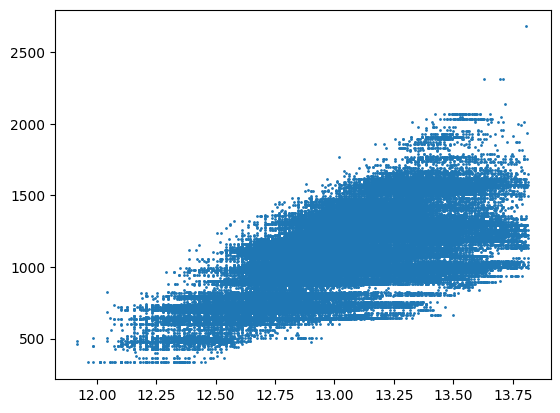

In [25]:
# L - Linearity
plt.scatter(np.log(housing['resale_price']), housing["floor_area_sqft"], s=1);

In [26]:
# I - Independence
# Yes - by,assumption

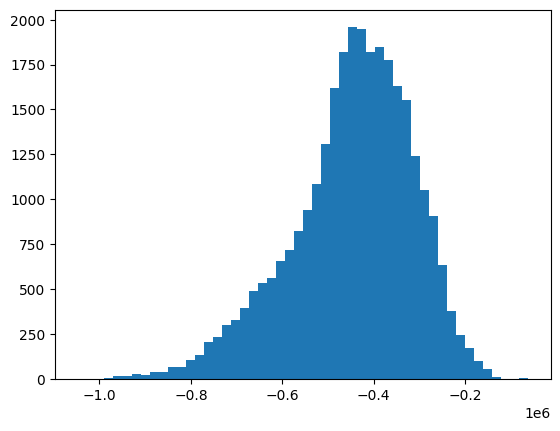

In [27]:
# N - Normality of errors
resids = y_test - y_pred
plt.hist(resids, bins=50);

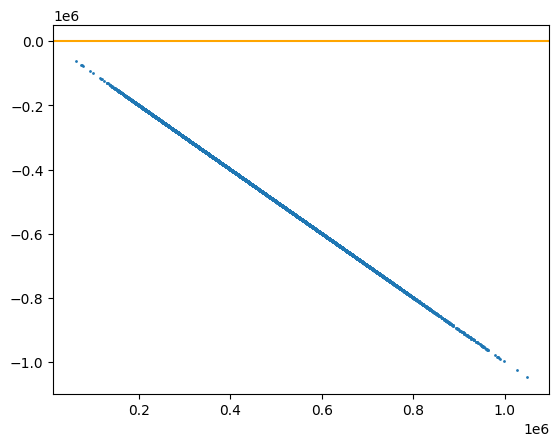

In [28]:
# E - Equal variance of errors
plt.scatter(y_pred, resids, s=1)
plt.axhline(0, color="orange");